In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=UserWarning)
kayaking=pd.read_excel(r"C:\Users\vcsat\Desktop\New folder\V02Max_Combined.xlsx",sheet_name=0)
athletes=pd.read_excel(r"C:\Users\vcsat\Desktop\New folder\V02Max_Combined.xlsx",sheet_name=1)
triathlon=pd.read_excel(r"C:\Users\vcsat\Desktop\New folder\V02Max_Combined.xlsx",sheet_name=2)
fencing=pd.read_excel(r"C:\Users\vcsat\Desktop\New folder\V02Max_Combined.xlsx",sheet_name=3)

In [4]:
#1).Join all sport-related tables to produce one dataframe that has all athletes values
    #The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file

# Merging all three sports
df = [kayaking,triathlon,fencing]
Merged_df = pd.merge(kayaking,triathlon,how ='outer').merge(fencing,how ='outer')

# Write the final dataframe to an Excel file
Merged_df.to_excel("MergedV02n.xlsx", index=False)

print("Merged Dataframe saved to excel successfully")


Merged Dataframe saved to excel successfully


In [5]:
#2).Divide the rows into 3 parts: Warm up, GET and cool down using the data def. Label each row accordingly

# Label Warm up which has all negative time values
Merged_df.loc[Merged_df['time'] < 0, 'status'] = 'Warm up'

# Label GET which has time >= 0 and power > 0
Merged_df.loc[(Merged_df['time'] >= 0) & (Merged_df['power'] > 0), 'status'] = 'GET'

# By assuming cool down starts immediately after GET stage ends:
# It will be all rows where power drops to zero or very low value
Merged_df.loc[(Merged_df['time'] >= 0) & (Merged_df['power'] == 0), 'status'] = 'Cool down'

print(Merged_df[['ID','time','RR','power','VO2','status']])

# Save the final labeled dataframe to an Excel file
Merged_df.to_excel("V02Max_Labeled.xlsx", index=False)

print("Labeled dataframe saved to excel successfully")


       ID     time     RR  power       VO2     status
0       1 -130.840  672.0      0  0.302008    Warm up
1       1 -130.168  672.0      0  0.302008    Warm up
2       1 -129.536  632.0      0  0.301336    Warm up
3       1 -128.824  712.0      0  0.301336    Warm up
4       1 -127.948  876.0      0  0.301336    Warm up
...    ..      ...    ...    ...       ...        ...
52057  18  947.288  536.0      0  0.507071  Cool down
52058  18  947.816  528.0      0  0.507071  Cool down
52059  18  948.344  528.0      0  0.507071  Cool down
52060  18  948.884  540.0      0  0.507071  Cool down
52061  18  949.424  540.0      0  0.507071  Cool down

[52062 rows x 6 columns]
Labeled dataframe saved to excel successfully


In [32]:
#3).What was the average time each tested lasted excluding warm up for all athletes?

# Finding the avg_time
exc_warmup = Merged_df[Merged_df['status']!='Warm up']
avg_time = exc_warmup.groupby('status')['time'].mean().reset_index()
print(avg_time)

      status        time
0  Cool down  993.988405
1        GET  512.492916


In [42]:
#4).Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

# Finding te difference between RR intervals
Merged_df['RR_diff'] = Merged_df.groupby('ID')['RR'].diff()

# Calculating standard deviation for each athletes
Merged_df['HRV'] = Merged_df.groupby('ID')['RR_diff'].transform('std')

# Merging athletes table 
athlete_sport = Merged_df.merge(athletes, on = 'ID',how = "outer")
athlete_sport.head(5)

# Finding the avg
average_hrv_sport = athlete_sport.groupby('sport')['HRV'].mean()

# Finding the sport with the highest average HRV
HRV_highest = average_hrv_sport.idxmax()
highest_avgerage_hrv_value = average_hrv_sport.max()
print(f"The sport with the highest HRV is '{HRV_highest}' with an avg hrv value of : {highest_avgerage_hrv_value:.2f}")


The sport with the highest HRV is 'kayak' with an avg hrv value of : 150.26


In [9]:
#5).What was the average time each test lasted (including warm up) for all athletes?

# Finding the average time
workout = Merged_df.groupby('status')['time'].mean().reset_index()
print(workout)

      status        time
0  Cool down  993.988405
1        GET  512.492916
2    Warm up  -90.058246


In [50]:
#6).What was the most common  wattage (above 0) achieved by participants and for how many seconds (average time)? 
   #You may choose to show averages based on any one/all sports. 

# Filtering the specific sport:
df_athelets = pd.merge(Merged_df,athletes,how = 'outer')
df_athelets = df_athelets[df_athelets['sport']=='fencing']
power_value = df_athelets[df_athelets['power']>0]
Most_common_power  =power_value['power'].value_counts().idxmax()

# Finding the avg time_second
Average_time = power_value[power_value['power']== Most_common_power]['time'].mean()
print(f"Most common power above 0:{Most_common_power}watts")
print(f"Average time for the sport fencing with watts is {Most_common_power}watts:time taken is {Average_time} seconds")


Most common power above 0:50watts
Average time for the sport fencing with watts is 50watts:time taken is 91.16035142118862 seconds


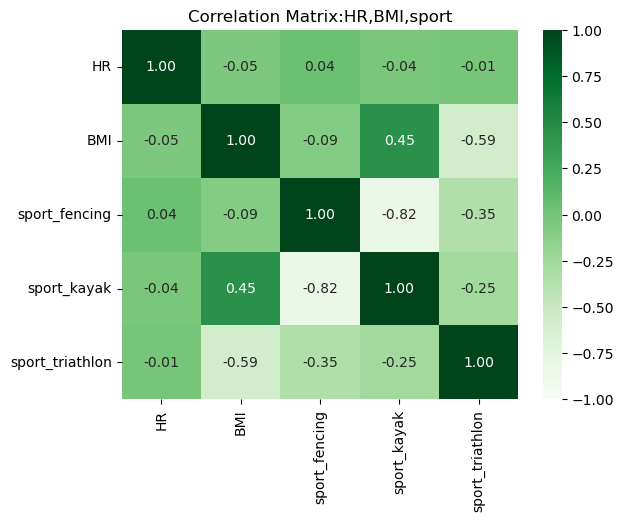

In [45]:
#7).Create a correlation matrix to show the relationship between HR, BMI and sport

# Finding the avg heartrate:
Merged_df['HR'] = 60/(Merged_df['RR']/1000)
avg_HR_ath = Merged_df.groupby('ID')['HR'].mean().reset_index()

# Finding bmi:
athletes['BMI'] = round(athletes['Weight']/(athletes['Height']*2),2)
Merged_df1 = pd.merge(Merged_df,athletes,on ='ID',how ='inner')

# Finding Correlation:
correlation_data = Merged_df1[['HR','BMI','sport']]
correlation_encoded = pd.get_dummies(correlation_data, columns = ['sport'])
correlation_matrix = correlation_encoded.corr()

# Freating a heatmap:
plt.figure(figure = (12,10))
sns.heatmap(correlation_matrix,annot = True,cmap = 'Greens',fmt ='.2f',vmin = -1,vmax = 1)

# Show the plot
plt.title('Correlation Matrix:HR,BMI,sport')
plt.show()

In [16]:
#8).What are the names of the kayaking athletes?

# Merging first and lastname
athletes['Full Name'] = athletes['First Name'] + ' ' + athletes['Last Name']

# Finding the athletes name
sport = athletes[athletes["sport"]== "kayak"]
print(sport[['Full Name','sport']])


           Full Name  sport
10  Isabella Griffin  kayak
11       Caleb Dixon  kayak
12     Mia Carpenter  kayak
13   Harper Mitchell  kayak
14     Mason Wallace  kayak
15    Logan Anderson  kayak


In [53]:
#9).What was the average HRV of the triathletes?

# Finding RR difference with each athlete
triathlon['RR_Diff'] = triathlon.groupby('ID')['RR'].diff()

# Finding std deviation from RR intervals
average_hrv = triathlon.groupby('ID')['RR_Diff'].std()

# Finding the avg of RR
avg = average_hrv.mean()
print(f"The average HRV of the triathlon is {avg:.2f}")

The average HRV of the triathlon is 29.29


In [8]:
#10).How long was athlete 12 in HR Zone 5?

# Filtering the athlete 12 in HR Zone 5
df_filt =athlete_triathlon[(athlete_triathlon["ID"]==12) & (athlete_triathlon["Zone"]=='Zone 5 ((Anaerobic)')]
#Total time spent in zone 5
Zone_5_time = df_filt['time'].sum()
print(f"Athlete 12 spent {Zone_5_time} seconds hr Zone 5.")

Athlete 12 spent 0.0 seconds hr Zone 5.


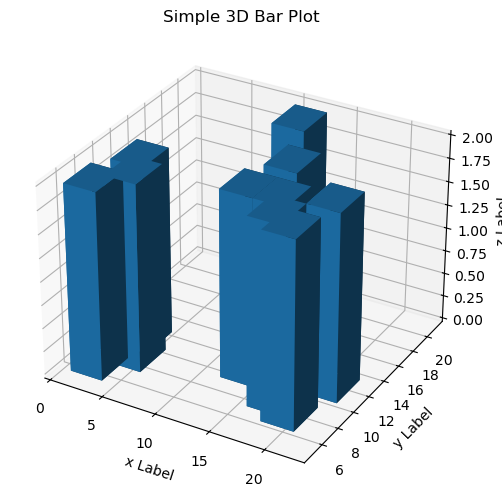

In [19]:
#11).Create any 3d plot using any data. Values do not have to be from the dataset given. 
 	
from mpl_toolkits import mplot3d
num_bars=10
#Random x,y and z coordinates for the bars
x = np.random.randint(1, 20, num_bars)
y = np.random.randint(1, 20, num_bars)
z = np.random.randint(1, 10, num_bars)

width = 3
#3d bar plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x, y, np.zeros_like(z), width, width, 2)

#set labes and title
ax.set_xlabel('x Label')
ax.set_ylabel('y Label')
ax.set_zlabel('z Label')
ax.set_title('Simple 3D Bar Plot')

plt.show()

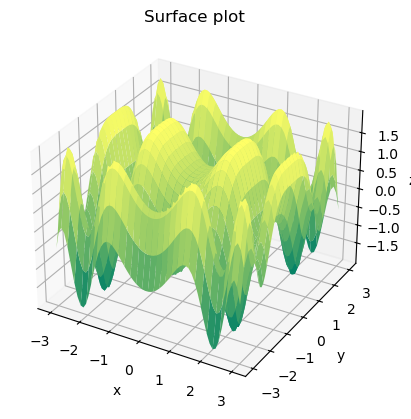

In [46]:
#11).Create any 3d plot using any data. Values do not have to be from the dataset given. 

# Method for creating meshgrid 
x = np.outer(np.linspace(-3,3,64),np.ones(64))
y = x.copy().T
z = (np.sin(x **2) + np.cos(y **2) )

# Creating fgure and axis
fig = plt.figure()
ax = plt.axes(projection ='3d')

# Colour map
my_cmap = plt.get_cmap('summer')

# Creating the pot
surf = ax.plot_surface(x, y, z,
                       cmap = my_cmap,
                       edgecolor = 'none')

#Set labes and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z ')
ax.set_title('Surface plot')

plt.show()

In [21]:
#12).What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

#Merging athletes table with another table
athletes['Full Name'] = athletes['First Name']+" "+athletes['Last Name']
merged_athlete = athletes.merge(Merged_df, on='ID', how = 'right')

#Total of all VO2 values per athlete
total_vo2_per_athlete = merged_athlete.groupby(['ID', 'Full Name','sport','Weight'])['VO2'].sum()
total_vo2_per_athlete = total_vo2_per_athlete.reset_index(name = 'total vo2')

#Calculation of VO2max
total_vo2_per_athlete['VO2 Max'] = total_vo2_per_athlete['total vo2'] / total_vo2_per_athlete['Weight']

#Getting the 3 largest VO2 max values
highest_3_vo2_max = total_vo2_per_athlete.nlargest(3,'VO2 Max')
highest_3_vo2_max = highest_3_vo2_max[['ID', 'Full Name','sport','VO2 Max']]
print(highest_3_vo2_max)

    ID         Full Name  sport    VO2 Max
11  12       Caleb Dixon  kayak  92.258212
12  13     Mia Carpenter  kayak  90.758693
10  11  Isabella Griffin  kayak  89.586903


In [24]:
#13). Calculate the year of birth of each athlete and store it as a column in the tables 

#To find year of birth
from datetime import date
today = date.today()
athletes['year of birth'] = today.year-athletes['age']
print(athletes)

    ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1   15    53.7     161     50    140    fencing  Female   African   
1    2   15    56.2     162     80    127    fencing    Male   African   
2    3   16    89.9     191    155    300    fencing    Male     White   
3    4   16    76.5     180    215    275    fencing    Male     White   
4    5   17    76.4     186    110    172    fencing  Female     White   
5    6   17    65.6     169    131    186    fencing  Female     White   
6    7   15    49.8     165     65    108    fencing  Female     White   
7    8   15    51.2     165     80    133    fencing  Female     White   
8    9   14    57.1     176     50    125    fencing  Female   African   
9   10   14    58.8     177    101    162    fencing  Female   African   
10  11   18    84.8     182    174    268      kayak  Female   African   
11  12   18    86.0     183    170    294      kayak    Male   African   
12  13   18    83.9     183    144    

In [18]:
#14).What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

# Merging athletes table with another table
athletes['Full Name'] = athletes['First Name']+" "+athletes['Last Name']
merged_athlete = athletes.merge(Merged_df, on='ID', how = 'right')

# Total of all VO2 values per athlete
total_vo2_per_athlete = merged_athlete.groupby(['ID', 'Full Name','sport','Weight'])['VO2'].sum()
total_vo2_per_athlete = total_vo2_per_athlete.reset_index(name ='total vo2')

# Calculation of VO2max
total_vo2_per_athlete['VO2 Max'] = total_vo2_per_athlete['total vo2'] / total_vo2_per_athlete['Weight']

# Get the 3 smallest VO2 max values
lowest_3_vo2_max = total_vo2_per_athlete.nsmallest(3,'VO2 Max')

# Select and display the relevent columns
lowest_3_vo2_max = lowest_3_vo2_max[['ID', 'Full Name','sport','VO2 Max']]
print(lowest_3_vo2_max)

   ID        Full Name    sport    VO2 Max
6   7    Grace Simmons  fencing  38.403988
1   2   Ethan Reynolds  fencing  38.632602
0   1  Olivia Martinez  fencing  42.807730


In [26]:
#16).Calculate the BMI of every athlete and display it as a list.

# To find BMI
athletes['BMI'] = round(athletes['Weight']/(athletes['Height']*2),2)

# Converting BMI column to list
BMI_list=athletes['BMI'].tolist()
print("List of BMIs for each athlete:",BMI_list)

List of BMIs for each athlete: [0.17, 0.17, 0.24, 0.21, 0.21, 0.19, 0.15, 0.16, 0.16, 0.17, 0.23, 0.23, 0.23, 0.18, 0.18, 0.19, 0.13, 0.13]


In [6]:
#15).Assign 1 of the following 5 heart rate zones for every record for all sports and athletes
# and add this as a column to every table:
#Zone 1 (recovery/easy)       <100 HR max 
#Zone 2 (aerobic/base)        100-120 HR max
#Zone 3 (tempo)               120-135 HR max
#Zone 4 (lactate threshold)   135-155 HR max
#Zone 5 (anaerobic)           155+ HR max and above

# Merging table
athlete_triathlon = athletes.merge(Merged_df, on ='ID', how = 'right')

# Finding HR Max
athlete_triathlon['HR'] = 60 / (athlete_triathlon['RR'] / 1000)

# Assigning zone
Zone_1 =  athlete_triathlon['HR'] <100
Zone_2 = (athlete_triathlon['HR'] >=100 ) & (athlete_triathlon['HR'] <120)
Zone_3 = (athlete_triathlon['HR'] >=120 ) & (athlete_triathlon['HR'] <135)
Zone_4 = (athlete_triathlon['HR'] >=135 ) & (athlete_triathlon['HR'] <155)
Zone_5 =  athlete_triathlon['HR'] >=155

# Asssigning the zones

athlete_triathlon.loc[Zone_1, 'Zone'] = 'Zone 1 (Recovery/Easy)'
athlete_triathlon.loc[Zone_2, 'Zone'] = 'Zone 2 (Aerobic/Base)'
athlete_triathlon.loc[Zone_3, 'Zone'] = 'Zone 3 (Tempo)'
athlete_triathlon.loc[Zone_4, 'Zone'] = 'Zone 4 (Lactate Threshold)'
athlete_triathlon.loc[Zone_5, 'Zone'] = 'Zone 5 (Anaerobic)'

# Final DataFrame to a new Excel file
output_file = 'Zonewise_athlete_data.xlsx'
athlete_triathlon.to_excel(output_file, index = False)
print(athlete_triathlon)

       ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0       1   15    53.7     161     50    140    fencing  Female   African   
1       1   15    53.7     161     50    140    fencing  Female   African   
2       1   15    53.7     161     50    140    fencing  Female   African   
3       1   15    53.7     161     50    140    fencing  Female   African   
4       1   15    53.7     161     50    140    fencing  Female   African   
...    ..  ...     ...     ...    ...    ...        ...     ...       ...   
52057  18   12    39.7     158     65    168  triathlon    Male    Latino   
52058  18   12    39.7     158     65    168  triathlon    Male    Latino   
52059  18   12    39.7     158     65    168  triathlon    Male    Latino   
52060  18   12    39.7     158     65    168  triathlon    Male    Latino   
52061  18   12    39.7     158     65    168  triathlon    Male    Latino   

      First Name Last Name     time     RR       VO2  power     status  \
0

In [7]:
athlete_triathlon

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,time,RR,VO2,power,status,HR,Zone
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,-130.840,672.0,0.302008,0,Warm up,89.285714,Zone 1 (Recovery/Easy)
1,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,-130.168,672.0,0.302008,0,Warm up,89.285714,Zone 1 (Recovery/Easy)
2,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,-129.536,632.0,0.301336,0,Warm up,94.936709,Zone 1 (Recovery/Easy)
3,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,-128.824,712.0,0.301336,0,Warm up,84.269663,Zone 1 (Recovery/Easy)
4,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,-127.948,876.0,0.301336,0,Warm up,68.493151,Zone 1 (Recovery/Easy)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,947.288,536.0,0.507071,0,Cool down,111.940299,Zone 2 (Aerobic/Base)
52058,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,947.816,528.0,0.507071,0,Cool down,113.636364,Zone 2 (Aerobic/Base)
52059,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,948.344,528.0,0.507071,0,Cool down,113.636364,Zone 2 (Aerobic/Base)
52060,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,948.884,540.0,0.507071,0,Cool down,111.111111,Zone 2 (Aerobic/Base)
